In [1]:
import numpy as np
import random
import itertools

In [2]:
def file_reader2(filename):
    with open(filename) as f:
        lines = f.readlines()
        lines = [np.array(f.replace(" \n","\n").split(" ")[0:len(lines)]).astype(int) for f in lines]
        return lines
def write(filename,line):
    with open(filename, "w") as text_file:
        for l in range(len(line)-1):
            text_file.write(str(line[l]))
            text_file.write("\n")
        text_file.write(str(line[-1]))

In [3]:
class ZOE:
    def __init__(self,m,n,A):
        self.m = m
        self.n = n
        self.A = A
    def creat_population(self,size):
        p = []
        for i in range(size):
            p.append(np.random.choice([0,1], self.n))
        return p
    def crossover(self,p1,p2):
        j = np.random.choice(len(p1))
        c1 = np.append(p1[0:j+1],p2[j+1:])
        c2 = np.append(p2[0:j+1],p1[j+1:])
        return c1,c2
    def mutation(self, p):
        j = np.random.choice(len(p))
        p[j] = 1 - p[j]
        return p
    def fitness_function(self,population):
        f = []
        for p in population:
            scr = 0
            for a in self.A:
                if np.array(a).dot(np.array(p)) == 1:
                    scr = scr + 1
            f.append(scr)
        return f
    def solve(self,init_size,cross_k,cross_p,mutation_p):
        population = self.creat_population(init_size)
        fitness = self.fitness_function(population)
        epoch = 0
        bestfitness = []
        diversity = []
        meanfitness = []
        past_best = np.max(fitness)
        counter = 0
        while True:
            epoch = epoch + 1
            newpopulation = []
            for i in range(cross_p):
                k = np.random.choice(len(population),cross_k,replace = False)
                p = np.array(fitness)[k]
                p = p/np.sum(p)
                parents = np.random.choice(len(k),2,p = p)
                c1,c2 = self.crossover(np.array(population)[k][parents[0]],np.array(population)[k][parents[1]])
                if random.uniform(0, 1)<=mutation_p:
                    c1 = self.mutation(c1)
                    c2 = self.mutation(c2)
                newpopulation.append(c1)
                newpopulation.append(c2)
            temp = []
            ind = np.array(fitness).argsort()
            fitness = np.array(fitness)[ind[::-1]]
            population = np.array(population)[ind[::-1]]
            for i in range(len(population)-len(newpopulation)):
                temp.append(population[i])
            for x in newpopulation:
                temp.append(x)
            population = np.array(temp)
            del temp
            fitness = self.fitness_function(population)
            diversity.append(len(np.unique(population,axis = 0)))
            bestfitness.append(np.max(fitness))
            meanfitness.append(np.mean(fitness))
            print("epoch:"+str(epoch)+"best fitness:"+str(bestfitness[-1])+"diversity:"+str(diversity[-1]))
            if self.m in fitness:
                print(population[np.argmax(fitness)])
                return diversity, bestfitness, meanfitness, population[np.argmax(fitness)]
            if past_best == bestfitness[-1]:
                counter = counter + 1
            else:
                counter = 0
            past_best = bestfitness[-1]
            if counter>4000:
                print("sub_optimal solution found:")
                print(population[np.argmax(fitness)])
                return diversity, bestfitness, meanfitness, population[np.argmax(fitness)]
       
    

In [84]:
g = file_reader2("./input30_2.txt")
z = ZOE(np.shape(g)[0],np.shape(g)[1],g)
d,b,m,r = z.solve(300,30,100,0.3)
write("output.txt",r)

epoch:1best fitness:21diversity:289
epoch:2best fitness:22diversity:282
epoch:3best fitness:23diversity:277
epoch:4best fitness:23diversity:282
epoch:5best fitness:23diversity:273
epoch:6best fitness:24diversity:258
epoch:7best fitness:24diversity:249
epoch:8best fitness:24diversity:258
epoch:9best fitness:25diversity:254
epoch:10best fitness:25diversity:257
epoch:11best fitness:25diversity:261
epoch:12best fitness:25diversity:251
epoch:13best fitness:26diversity:239
epoch:14best fitness:26diversity:245
epoch:15best fitness:26diversity:223
epoch:16best fitness:26diversity:220
epoch:17best fitness:27diversity:214
epoch:18best fitness:27diversity:214
epoch:19best fitness:27diversity:208
epoch:20best fitness:27diversity:195
epoch:21best fitness:30diversity:192
[0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1]


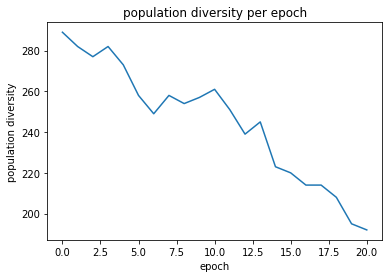

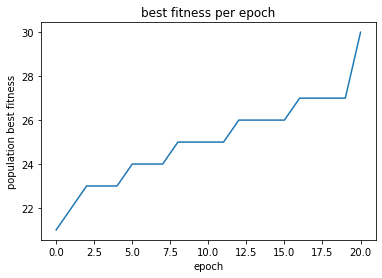

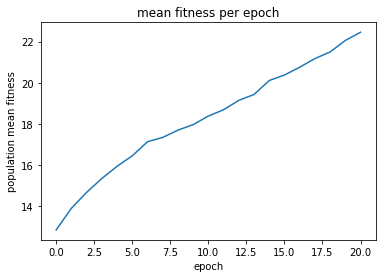

In [85]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(d))],d)
plt.title("population diversity per epoch")
plt.xlabel("epoch")
plt.ylabel("population diversity")
plt.show()
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(b))],b)
plt.title("best fitness per epoch")
plt.xlabel("epoch")
plt.ylabel("population best fitness")
plt.show()
plt.plot([i for i in range(len(m))],m)
plt.title("mean fitness per epoch")
plt.xlabel("epoch")
plt.ylabel("population mean fitness")
plt.show()

In [90]:
g = file_reader2("./input60_2.txt")
z = ZOE(np.shape(g)[0],np.shape(g)[1],g)
d,b,m,r = z.solve(300,30,100,0.6)
write("output.txt",r)

epoch:1best fitness:22diversity:299
epoch:2best fitness:25diversity:297
epoch:3best fitness:25diversity:294
epoch:4best fitness:26diversity:295
epoch:5best fitness:30diversity:297
epoch:6best fitness:30diversity:296
epoch:7best fitness:30diversity:288
epoch:8best fitness:30diversity:295
epoch:9best fitness:31diversity:295
epoch:10best fitness:31diversity:293
epoch:11best fitness:33diversity:291
epoch:12best fitness:33diversity:292
epoch:13best fitness:34diversity:286
epoch:14best fitness:39diversity:286
epoch:15best fitness:39diversity:287
epoch:16best fitness:39diversity:285
epoch:17best fitness:39diversity:287
epoch:18best fitness:39diversity:288
epoch:19best fitness:39diversity:293
epoch:20best fitness:41diversity:287
epoch:21best fitness:47diversity:293
epoch:22best fitness:47diversity:298
epoch:23best fitness:49diversity:298
epoch:24best fitness:49diversity:292
epoch:25best fitness:49diversity:285
epoch:26best fitness:49diversity:280
epoch:27best fitness:49diversity:267
epoch:28be

In [98]:
write("output.txt",r)

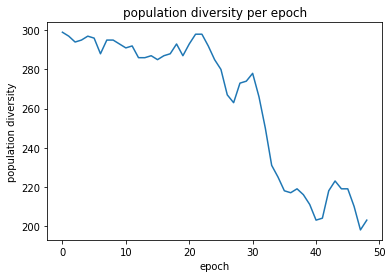

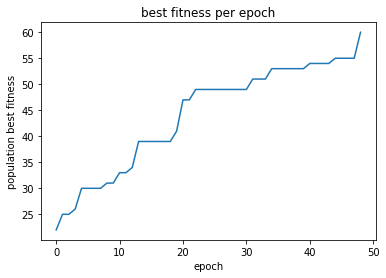

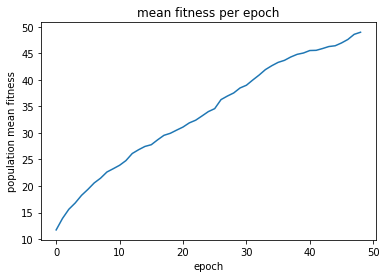

In [91]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(d))],d)
plt.title("population diversity per epoch")
plt.xlabel("epoch")
plt.ylabel("population diversity")
plt.show()
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(b))],b)
plt.title("best fitness per epoch")
plt.xlabel("epoch")
plt.ylabel("population best fitness")
plt.show()
plt.plot([i for i in range(len(m))],m)
plt.title("mean fitness per epoch")
plt.xlabel("epoch")
plt.ylabel("population mean fitness")
plt.show()

In [23]:
g = file_reader2("./input41.txt")
z = ZOE(np.shape(g)[0],np.shape(g)[1],g)
d,b,m,r = z.solve(300,30,100,0.7)
write("output.txt",r)

epoch:1best fitness:8diversity:293
epoch:2best fitness:8diversity:291
epoch:3best fitness:12diversity:287
epoch:4best fitness:12diversity:290
epoch:5best fitness:12diversity:288
epoch:6best fitness:12diversity:287
epoch:7best fitness:12diversity:291
epoch:8best fitness:12diversity:291
epoch:9best fitness:14diversity:282
epoch:10best fitness:14diversity:291
epoch:11best fitness:14diversity:285
epoch:12best fitness:15diversity:287
epoch:13best fitness:16diversity:282
epoch:14best fitness:16diversity:275
epoch:15best fitness:17diversity:283
epoch:16best fitness:21diversity:278
epoch:17best fitness:21diversity:282
epoch:18best fitness:26diversity:278
epoch:19best fitness:26diversity:278
epoch:20best fitness:27diversity:280
epoch:21best fitness:27diversity:281
epoch:22best fitness:27diversity:278
epoch:23best fitness:27diversity:263
epoch:24best fitness:27diversity:255
epoch:25best fitness:30diversity:257
epoch:26best fitness:30diversity:245
epoch:27best fitness:32diversity:251
epoch:28best

epoch:222best fitness:36diversity:116
epoch:223best fitness:36diversity:119
epoch:224best fitness:36diversity:108
epoch:225best fitness:36diversity:91
epoch:226best fitness:36diversity:95
epoch:227best fitness:36diversity:105
epoch:228best fitness:36diversity:111
epoch:229best fitness:36diversity:108
epoch:230best fitness:36diversity:95
epoch:231best fitness:36diversity:100
epoch:232best fitness:36diversity:108
epoch:233best fitness:36diversity:118
epoch:234best fitness:36diversity:116
epoch:235best fitness:36diversity:111
epoch:236best fitness:36diversity:105
epoch:237best fitness:36diversity:104
epoch:238best fitness:36diversity:123
epoch:239best fitness:36diversity:120
epoch:240best fitness:36diversity:113
epoch:241best fitness:36diversity:122
epoch:242best fitness:36diversity:124
epoch:243best fitness:36diversity:119
epoch:244best fitness:36diversity:108
epoch:245best fitness:36diversity:106
epoch:246best fitness:36diversity:123
epoch:247best fitness:36diversity:111
epoch:248best f

epoch:441best fitness:36diversity:106
epoch:442best fitness:36diversity:105
epoch:443best fitness:36diversity:113
epoch:444best fitness:36diversity:99
epoch:445best fitness:36diversity:100
epoch:446best fitness:36diversity:102
epoch:447best fitness:36diversity:112
epoch:448best fitness:36diversity:120
epoch:449best fitness:36diversity:123
epoch:450best fitness:36diversity:102
epoch:451best fitness:36diversity:118
epoch:452best fitness:36diversity:115
epoch:453best fitness:36diversity:114
epoch:454best fitness:36diversity:123
epoch:455best fitness:36diversity:102
epoch:456best fitness:36diversity:105
epoch:457best fitness:36diversity:107
epoch:458best fitness:36diversity:118
epoch:459best fitness:36diversity:115
epoch:460best fitness:36diversity:120
epoch:461best fitness:36diversity:114
epoch:462best fitness:36diversity:108
epoch:463best fitness:36diversity:107
epoch:464best fitness:36diversity:102
epoch:465best fitness:36diversity:108
epoch:466best fitness:36diversity:126
epoch:467best

epoch:659best fitness:36diversity:107
epoch:660best fitness:36diversity:101
epoch:661best fitness:36diversity:110
epoch:662best fitness:36diversity:119
epoch:663best fitness:36diversity:108
epoch:664best fitness:36diversity:114
epoch:665best fitness:36diversity:102
epoch:666best fitness:36diversity:96
epoch:667best fitness:36diversity:94
epoch:668best fitness:36diversity:105
epoch:669best fitness:36diversity:101
epoch:670best fitness:36diversity:95
epoch:671best fitness:36diversity:102
epoch:672best fitness:36diversity:111
epoch:673best fitness:36diversity:110
epoch:674best fitness:36diversity:118
epoch:675best fitness:36diversity:111
epoch:676best fitness:36diversity:122
epoch:677best fitness:36diversity:119
epoch:678best fitness:36diversity:109
epoch:679best fitness:36diversity:104
epoch:680best fitness:36diversity:122
epoch:681best fitness:36diversity:103
epoch:682best fitness:36diversity:96
epoch:683best fitness:36diversity:104
epoch:684best fitness:36diversity:114
epoch:685best fi

epoch:881best fitness:36diversity:112
epoch:882best fitness:36diversity:115
epoch:883best fitness:36diversity:115
epoch:884best fitness:36diversity:105
epoch:885best fitness:36diversity:120
epoch:886best fitness:36diversity:120
epoch:887best fitness:36diversity:105
epoch:888best fitness:36diversity:88
epoch:889best fitness:36diversity:100
epoch:890best fitness:36diversity:110
epoch:891best fitness:36diversity:116
epoch:892best fitness:36diversity:112
epoch:893best fitness:36diversity:118
epoch:894best fitness:36diversity:104
epoch:895best fitness:36diversity:112
epoch:896best fitness:36diversity:108
epoch:897best fitness:36diversity:124
epoch:898best fitness:36diversity:117
epoch:899best fitness:36diversity:105
epoch:900best fitness:36diversity:120
epoch:901best fitness:36diversity:127
epoch:902best fitness:36diversity:123
epoch:903best fitness:36diversity:97
epoch:904best fitness:36diversity:106
epoch:905best fitness:36diversity:104
epoch:906best fitness:36diversity:112
epoch:907best 

epoch:1095best fitness:36diversity:109
epoch:1096best fitness:36diversity:104
epoch:1097best fitness:36diversity:105
epoch:1098best fitness:36diversity:93
epoch:1099best fitness:36diversity:112
epoch:1100best fitness:36diversity:110
epoch:1101best fitness:36diversity:116
epoch:1102best fitness:36diversity:122
epoch:1103best fitness:36diversity:113
epoch:1104best fitness:36diversity:115
epoch:1105best fitness:36diversity:116
epoch:1106best fitness:36diversity:118
epoch:1107best fitness:36diversity:112
epoch:1108best fitness:36diversity:115
epoch:1109best fitness:36diversity:104
epoch:1110best fitness:36diversity:98
epoch:1111best fitness:36diversity:110
epoch:1112best fitness:36diversity:124
epoch:1113best fitness:36diversity:103
epoch:1114best fitness:36diversity:93
epoch:1115best fitness:36diversity:101
epoch:1116best fitness:36diversity:114
epoch:1117best fitness:36diversity:120
epoch:1118best fitness:36diversity:113
epoch:1119best fitness:36diversity:112
epoch:1120best fitness:36div

epoch:1308best fitness:36diversity:114
epoch:1309best fitness:36diversity:109
epoch:1310best fitness:36diversity:110
epoch:1311best fitness:36diversity:113
epoch:1312best fitness:36diversity:125
epoch:1313best fitness:36diversity:124
epoch:1314best fitness:36diversity:129
epoch:1315best fitness:36diversity:118
epoch:1316best fitness:36diversity:102
epoch:1317best fitness:36diversity:99
epoch:1318best fitness:36diversity:110
epoch:1319best fitness:36diversity:106
epoch:1320best fitness:36diversity:98
epoch:1321best fitness:36diversity:94
epoch:1322best fitness:36diversity:103
epoch:1323best fitness:36diversity:111
epoch:1324best fitness:36diversity:116
epoch:1325best fitness:36diversity:101
epoch:1326best fitness:36diversity:117
epoch:1327best fitness:36diversity:121
epoch:1328best fitness:36diversity:120
epoch:1329best fitness:36diversity:102
epoch:1330best fitness:36diversity:109
epoch:1331best fitness:36diversity:103
epoch:1332best fitness:36diversity:121
epoch:1333best fitness:36div

epoch:1523best fitness:36diversity:113
epoch:1524best fitness:36diversity:119
epoch:1525best fitness:36diversity:112
epoch:1526best fitness:36diversity:121
epoch:1527best fitness:36diversity:109
epoch:1528best fitness:36diversity:111
epoch:1529best fitness:36diversity:116
epoch:1530best fitness:36diversity:121
epoch:1531best fitness:36diversity:106
epoch:1532best fitness:36diversity:105
epoch:1533best fitness:36diversity:104
epoch:1534best fitness:36diversity:102
epoch:1535best fitness:36diversity:110
epoch:1536best fitness:36diversity:107
epoch:1537best fitness:36diversity:105
epoch:1538best fitness:36diversity:118
epoch:1539best fitness:36diversity:114
epoch:1540best fitness:36diversity:105
epoch:1541best fitness:36diversity:122
epoch:1542best fitness:36diversity:104
epoch:1543best fitness:36diversity:107
epoch:1544best fitness:36diversity:107
epoch:1545best fitness:36diversity:100
epoch:1546best fitness:36diversity:97
epoch:1547best fitness:36diversity:109
epoch:1548best fitness:36d

epoch:1739best fitness:36diversity:115
epoch:1740best fitness:36diversity:107
epoch:1741best fitness:36diversity:111
epoch:1742best fitness:36diversity:121
epoch:1743best fitness:36diversity:118
epoch:1744best fitness:36diversity:108
epoch:1745best fitness:36diversity:113
epoch:1746best fitness:36diversity:110
epoch:1747best fitness:36diversity:100
epoch:1748best fitness:36diversity:109
epoch:1749best fitness:36diversity:109
epoch:1750best fitness:36diversity:113
epoch:1751best fitness:36diversity:102
epoch:1752best fitness:36diversity:103
epoch:1753best fitness:36diversity:100
epoch:1754best fitness:36diversity:110
epoch:1755best fitness:36diversity:117
epoch:1756best fitness:36diversity:107
epoch:1757best fitness:36diversity:99
epoch:1758best fitness:36diversity:96
epoch:1759best fitness:36diversity:98
epoch:1760best fitness:36diversity:104
epoch:1761best fitness:36diversity:111
epoch:1762best fitness:36diversity:114
epoch:1763best fitness:36diversity:117
epoch:1764best fitness:36div

epoch:1953best fitness:36diversity:116
epoch:1954best fitness:36diversity:106
epoch:1955best fitness:36diversity:116
epoch:1956best fitness:36diversity:105
epoch:1957best fitness:36diversity:113
epoch:1958best fitness:36diversity:117
epoch:1959best fitness:36diversity:114
epoch:1960best fitness:36diversity:112
epoch:1961best fitness:36diversity:100
epoch:1962best fitness:36diversity:104
epoch:1963best fitness:36diversity:107
epoch:1964best fitness:36diversity:104
epoch:1965best fitness:36diversity:106
epoch:1966best fitness:36diversity:103
epoch:1967best fitness:36diversity:114
epoch:1968best fitness:36diversity:120
epoch:1969best fitness:36diversity:117
epoch:1970best fitness:36diversity:101
epoch:1971best fitness:36diversity:98
epoch:1972best fitness:36diversity:102
epoch:1973best fitness:36diversity:104
epoch:1974best fitness:36diversity:118
epoch:1975best fitness:36diversity:116
epoch:1976best fitness:36diversity:113
epoch:1977best fitness:36diversity:125
epoch:1978best fitness:36d

epoch:2166best fitness:36diversity:113
epoch:2167best fitness:36diversity:109
epoch:2168best fitness:36diversity:102
epoch:2169best fitness:36diversity:114
epoch:2170best fitness:36diversity:119
epoch:2171best fitness:36diversity:108
epoch:2172best fitness:36diversity:112
epoch:2173best fitness:36diversity:126
epoch:2174best fitness:36diversity:96
epoch:2175best fitness:36diversity:110
epoch:2176best fitness:36diversity:105
epoch:2177best fitness:36diversity:104
epoch:2178best fitness:36diversity:115
epoch:2179best fitness:36diversity:115
epoch:2180best fitness:36diversity:117
epoch:2181best fitness:36diversity:108
epoch:2182best fitness:36diversity:119
epoch:2183best fitness:36diversity:106
epoch:2184best fitness:36diversity:115
epoch:2185best fitness:36diversity:111
epoch:2186best fitness:36diversity:118
epoch:2187best fitness:36diversity:116
epoch:2188best fitness:36diversity:109
epoch:2189best fitness:36diversity:118
epoch:2190best fitness:36diversity:117
epoch:2191best fitness:36d

epoch:2377best fitness:36diversity:113
epoch:2378best fitness:36diversity:115
epoch:2379best fitness:36diversity:92
epoch:2380best fitness:36diversity:93
epoch:2381best fitness:36diversity:111
epoch:2382best fitness:36diversity:116
epoch:2383best fitness:36diversity:107
epoch:2384best fitness:36diversity:111
epoch:2385best fitness:36diversity:115
epoch:2386best fitness:36diversity:110
epoch:2387best fitness:36diversity:109
epoch:2388best fitness:36diversity:111
epoch:2389best fitness:36diversity:104
epoch:2390best fitness:36diversity:98
epoch:2391best fitness:36diversity:104
epoch:2392best fitness:36diversity:104
epoch:2393best fitness:36diversity:105
epoch:2394best fitness:36diversity:102
epoch:2395best fitness:36diversity:111
epoch:2396best fitness:36diversity:112
epoch:2397best fitness:36diversity:113
epoch:2398best fitness:36diversity:106
epoch:2399best fitness:36diversity:114
epoch:2400best fitness:36diversity:117
epoch:2401best fitness:36diversity:120
epoch:2402best fitness:36div

epoch:2590best fitness:36diversity:106
epoch:2591best fitness:36diversity:107
epoch:2592best fitness:36diversity:105
epoch:2593best fitness:36diversity:112
epoch:2594best fitness:36diversity:117
epoch:2595best fitness:36diversity:91
epoch:2596best fitness:36diversity:100
epoch:2597best fitness:36diversity:120
epoch:2598best fitness:36diversity:103
epoch:2599best fitness:36diversity:92
epoch:2600best fitness:36diversity:107
epoch:2601best fitness:36diversity:105
epoch:2602best fitness:36diversity:107
epoch:2603best fitness:36diversity:103
epoch:2604best fitness:36diversity:105
epoch:2605best fitness:36diversity:102
epoch:2606best fitness:36diversity:100
epoch:2607best fitness:36diversity:106
epoch:2608best fitness:36diversity:99
epoch:2609best fitness:36diversity:102
epoch:2610best fitness:36diversity:110
epoch:2611best fitness:36diversity:106
epoch:2612best fitness:36diversity:100
epoch:2613best fitness:36diversity:104
epoch:2614best fitness:36diversity:119
epoch:2615best fitness:36div

epoch:2805best fitness:36diversity:108
epoch:2806best fitness:36diversity:110
epoch:2807best fitness:36diversity:120
epoch:2808best fitness:36diversity:107
epoch:2809best fitness:36diversity:112
epoch:2810best fitness:36diversity:101
epoch:2811best fitness:36diversity:108
epoch:2812best fitness:36diversity:106
epoch:2813best fitness:36diversity:115
epoch:2814best fitness:36diversity:107
epoch:2815best fitness:36diversity:112
epoch:2816best fitness:36diversity:102
epoch:2817best fitness:36diversity:102
epoch:2818best fitness:36diversity:111
epoch:2819best fitness:36diversity:103
epoch:2820best fitness:36diversity:109
epoch:2821best fitness:36diversity:98
epoch:2822best fitness:36diversity:109
epoch:2823best fitness:36diversity:106
epoch:2824best fitness:36diversity:118
epoch:2825best fitness:36diversity:112
epoch:2826best fitness:36diversity:107
epoch:2827best fitness:36diversity:112
epoch:2828best fitness:36diversity:116
epoch:2829best fitness:36diversity:105
epoch:2830best fitness:36d

epoch:3019best fitness:36diversity:123
epoch:3020best fitness:36diversity:122
epoch:3021best fitness:36diversity:116
epoch:3022best fitness:36diversity:112
epoch:3023best fitness:36diversity:116
epoch:3024best fitness:36diversity:105
epoch:3025best fitness:36diversity:112
epoch:3026best fitness:36diversity:107
epoch:3027best fitness:36diversity:112
epoch:3028best fitness:36diversity:114
epoch:3029best fitness:36diversity:106
epoch:3030best fitness:36diversity:125
epoch:3031best fitness:36diversity:127
epoch:3032best fitness:36diversity:113
epoch:3033best fitness:36diversity:105
epoch:3034best fitness:36diversity:97
epoch:3035best fitness:36diversity:98
epoch:3036best fitness:36diversity:104
epoch:3037best fitness:36diversity:112
epoch:3038best fitness:36diversity:119
epoch:3039best fitness:36diversity:110
epoch:3040best fitness:36diversity:124
epoch:3041best fitness:36diversity:126
epoch:3042best fitness:36diversity:122
epoch:3043best fitness:36diversity:112
epoch:3044best fitness:36di

epoch:3235best fitness:36diversity:122
epoch:3236best fitness:36diversity:115
epoch:3237best fitness:36diversity:116
epoch:3238best fitness:36diversity:107
epoch:3239best fitness:36diversity:115
epoch:3240best fitness:36diversity:117
epoch:3241best fitness:36diversity:106
epoch:3242best fitness:36diversity:99
epoch:3243best fitness:36diversity:113
epoch:3244best fitness:36diversity:95
epoch:3245best fitness:36diversity:100
epoch:3246best fitness:36diversity:96
epoch:3247best fitness:36diversity:109
epoch:3248best fitness:36diversity:115
epoch:3249best fitness:36diversity:95
epoch:3250best fitness:36diversity:106
epoch:3251best fitness:36diversity:102
epoch:3252best fitness:36diversity:112
epoch:3253best fitness:36diversity:122
epoch:3254best fitness:36diversity:120
epoch:3255best fitness:36diversity:129
epoch:3256best fitness:36diversity:106
epoch:3257best fitness:36diversity:105
epoch:3258best fitness:36diversity:103
epoch:3259best fitness:36diversity:102
epoch:3260best fitness:36dive

epoch:3447best fitness:36diversity:99
epoch:3448best fitness:36diversity:106
epoch:3449best fitness:36diversity:104
epoch:3450best fitness:36diversity:108
epoch:3451best fitness:36diversity:117
epoch:3452best fitness:36diversity:123
epoch:3453best fitness:36diversity:107
epoch:3454best fitness:36diversity:101
epoch:3455best fitness:36diversity:114
epoch:3456best fitness:36diversity:112
epoch:3457best fitness:36diversity:108
epoch:3458best fitness:36diversity:111
epoch:3459best fitness:36diversity:104
epoch:3460best fitness:36diversity:102
epoch:3461best fitness:36diversity:111
epoch:3462best fitness:36diversity:119
epoch:3463best fitness:36diversity:119
epoch:3464best fitness:36diversity:114
epoch:3465best fitness:36diversity:112
epoch:3466best fitness:36diversity:113
epoch:3467best fitness:36diversity:123
epoch:3468best fitness:36diversity:109
epoch:3469best fitness:36diversity:103
epoch:3470best fitness:36diversity:104
epoch:3471best fitness:36diversity:118
epoch:3472best fitness:36d

epoch:3661best fitness:36diversity:102
epoch:3662best fitness:36diversity:102
epoch:3663best fitness:36diversity:99
epoch:3664best fitness:36diversity:106
epoch:3665best fitness:36diversity:108
epoch:3666best fitness:36diversity:106
epoch:3667best fitness:36diversity:107
epoch:3668best fitness:36diversity:115
epoch:3669best fitness:36diversity:111
epoch:3670best fitness:36diversity:107
epoch:3671best fitness:36diversity:106
epoch:3672best fitness:36diversity:106
epoch:3673best fitness:36diversity:102
epoch:3674best fitness:36diversity:96
epoch:3675best fitness:36diversity:106
epoch:3676best fitness:36diversity:109
epoch:3677best fitness:36diversity:115
epoch:3678best fitness:36diversity:112
epoch:3679best fitness:36diversity:107
epoch:3680best fitness:36diversity:125
epoch:3681best fitness:36diversity:114
epoch:3682best fitness:36diversity:114
epoch:3683best fitness:36diversity:99
epoch:3684best fitness:36diversity:85
epoch:3685best fitness:36diversity:97
epoch:3686best fitness:36diver

epoch:3876best fitness:36diversity:107
epoch:3877best fitness:36diversity:101
epoch:3878best fitness:36diversity:99
epoch:3879best fitness:36diversity:115
epoch:3880best fitness:36diversity:110
epoch:3881best fitness:36diversity:104
epoch:3882best fitness:36diversity:96
epoch:3883best fitness:36diversity:102
epoch:3884best fitness:36diversity:110
epoch:3885best fitness:36diversity:100
epoch:3886best fitness:36diversity:120
epoch:3887best fitness:36diversity:116
epoch:3888best fitness:36diversity:119
epoch:3889best fitness:36diversity:126
epoch:3890best fitness:36diversity:110
epoch:3891best fitness:36diversity:117
epoch:3892best fitness:36diversity:101
epoch:3893best fitness:36diversity:117
epoch:3894best fitness:36diversity:106
epoch:3895best fitness:36diversity:101
epoch:3896best fitness:36diversity:113
epoch:3897best fitness:36diversity:112
epoch:3898best fitness:36diversity:116
epoch:3899best fitness:36diversity:100
epoch:3900best fitness:36diversity:107
epoch:3901best fitness:36di

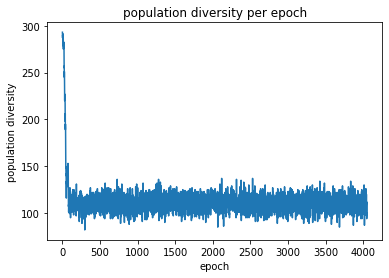

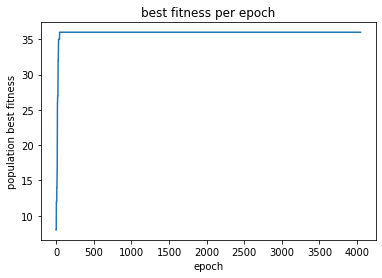

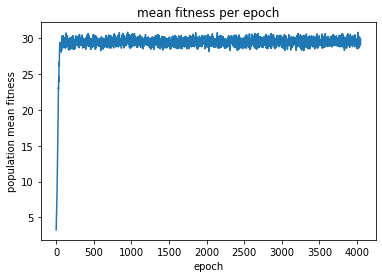

In [24]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(d))],d)
plt.title("population diversity per epoch")
plt.xlabel("epoch")
plt.ylabel("population diversity")
plt.show()
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(b))],b)
plt.title("best fitness per epoch")
plt.xlabel("epoch")
plt.ylabel("population best fitness")
plt.show()
plt.plot([i for i in range(len(m))],m)
plt.title("mean fitness per epoch")
plt.xlabel("epoch")
plt.ylabel("population mean fitness")
plt.show()

In [30]:
g = file_reader2("./input4140.txt")
z = ZOE(np.shape(g)[0],np.shape(g)[1],g)
d,b,m,r = z.solve(300,30,100,0.7)
write("output.txt",r)

epoch:1best fitness:7diversity:299
epoch:2best fitness:11diversity:299
epoch:3best fitness:11diversity:294
epoch:4best fitness:11diversity:288
epoch:5best fitness:11diversity:289
epoch:6best fitness:12diversity:286
epoch:7best fitness:13diversity:292
epoch:8best fitness:14diversity:291
epoch:9best fitness:14diversity:284
epoch:10best fitness:15diversity:288
epoch:11best fitness:15diversity:285
epoch:12best fitness:19diversity:283
epoch:13best fitness:19diversity:275
epoch:14best fitness:19diversity:280
epoch:15best fitness:23diversity:287
epoch:16best fitness:24diversity:287
epoch:17best fitness:27diversity:283
epoch:18best fitness:27diversity:277
epoch:19best fitness:28diversity:277
epoch:20best fitness:28diversity:272
epoch:21best fitness:28diversity:274
epoch:22best fitness:28diversity:271
epoch:23best fitness:28diversity:267
epoch:24best fitness:29diversity:267
epoch:25best fitness:29diversity:261
epoch:26best fitness:29diversity:256
epoch:27best fitness:30diversity:247
epoch:28bes

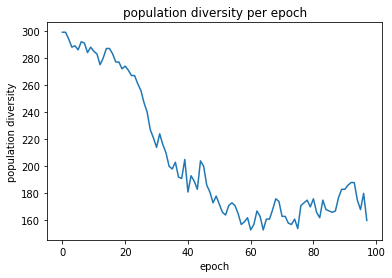

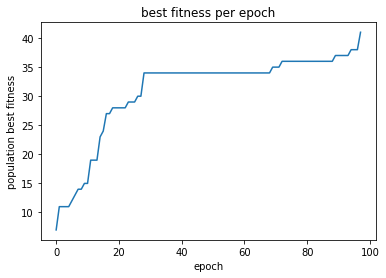

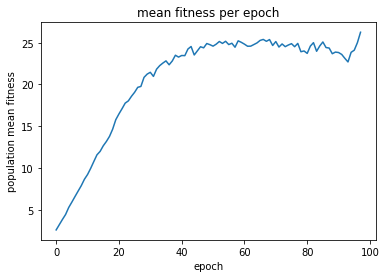

In [31]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(d))],d)
plt.title("population diversity per epoch")
plt.xlabel("epoch")
plt.ylabel("population diversity")
plt.show()
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(b))],b)
plt.title("best fitness per epoch")
plt.xlabel("epoch")
plt.ylabel("population best fitness")
plt.show()
plt.plot([i for i in range(len(m))],m)
plt.title("mean fitness per epoch")
plt.xlabel("epoch")
plt.ylabel("population mean fitness")
plt.show()